# Tratamento dos dados
### limpeza do dataframe "nba_starts" e suas bases auxiliares

In [14]:
#!gdown 1CoTy1ZnYZqsKWUgjM353KVLqJtTLWo-v

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [115]:
df = pd.read_csv('nba_stats.csv')
df_dic = pd.read_csv('dicionario_dataset_nba.csv')
df.head(3)

,year,name,playerId,playerSlug,positionId,teamId,status,gamesPlayed,avgMinutes,avgFouls,flagrantFouls,technicalFouls,ejections,doubleDouble,tripleDouble,minutes,rebounds,fouls,avgRebounds,avgPoints,avgFieldGoalsMade,avgFieldGoalsAttempted,fieldGoalPct,avgThreePointFieldGoalsMade,avgThreePointFieldGoalsAttempted,threePointFieldGoalPct,avgFreeThrowsMade,avgFreeThrowsAttempted,freeThrowPct,avgAssists,avgTurnovers,points,fieldGoalsMade,fieldGoalsAttempted,threePointFieldGoalsMade,threePointFieldGoalsAttempted,freeThrowsMade,freeThrowsAttempted,assists,turnovers,avgSteals,avgBlocks,steals,blocks,position,birthdate,college,draftinfo,birthplace,team,htwt,experience,rankingSalary,salary
0,1999,Allen Iverson,366,allen-iverson,SG,PHI,inactive,48.0,41.458332,2.041667,0.0,5.0,0.0,4.0,0.0,1990.0,236.0,98.0,4.916666,26.750000,9.062500,22.000000,41.193001,1.208333,4.145834,29.145730,7.416666,9.875000,75.105003,4.645834,3.479167,1284.0,435.0,1056.0,58.0,199.0,356.0,474.0,223.0,167.0,2.291667,0.145833,110.0,7.0,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,15,"$9,000,000"
1,2000,Allen Iverson,366,allen-iverson,SG,PHI,inactive,70.0,40.757140,2.314286,0.0,12.0,0.0,1.0,0.0,2853.0,267.0,162.0,3.814286,28.414286,10.414286,24.757143,42.066002,1.271429,3.728571,34.099618,6.314286,8.857142,71.290001,4.685714,3.285714,1989.0,729.0,1733.0,89.0,261.0,442.0,620.0,328.0,230.0,2.057143,0.071429,144.0,5.0,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,27,"$10,125,000"
2,2001,Allen Iverson,366,allen-iverson,SG,PHI,inactive,71.0,41.957745,2.070423,0.0,18.0,0.0,4.0,0.0,2979.0,273.0,147.0,3.845070,31.084507,10.732394,25.535212,42.029999,1.380282,4.309859,32.026145,8.239436,10.126760,81.362999,4.577465,3.338028,2207.0,762.0,1813.0,98.0,306.0,585.0,719.0,325.0,237.0,2.507042,0.281690,178.0,20.0,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,17,"$11,250,000"


In [ ]:
#df_dic
#df.info()

In [116]:
## conversão de string da coluna 'salary' para float
df['salary'] = (df['salary'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(np.float64))
df_=df.copy()

In [117]:
## conversão da data de nascimento para idade
#df_['birthdate'].unique()
df_['birthdate_clean'] = df_['birthdate'].str.replace(r'\s*\(.*\)', '', regex=True)
#df_['birthdate_clean'].unique()
df_['birthdate_clean'] = pd.to_datetime(df_['birthdate_clean'], dayfirst=False)
#df_['birthdate_clean'].unique()
df_['age'] = (pd.to_datetime('today') - df_['birthdate_clean']).dt.days // 365.25
#df_.head(3)

In [118]:
## identificando os valores vazios da coluna 'experience'
#df_['experience'].unique()
#df_.isna().sum()
#df_[df_['experience'].isna()].groupby('status').size()

In [119]:
## calculo da media salarial por ano
media_ano = df_.groupby('year')['salary'].mean().reset_index()
media_ano['salary'] = media_ano['salary'].apply(lambda x: f"{x:,.0f}")
#media_ano

In [120]:
## calculo da media salarial por posição
posi_valid = df_[df_['position'] != 'Not Available']
media_posi = posi_valid.groupby('position')['salary'].mean().reset_index()
media_posi['salary'] = media_posi['salary'].apply(lambda x: f"{x:,.0f}")
#media_posi

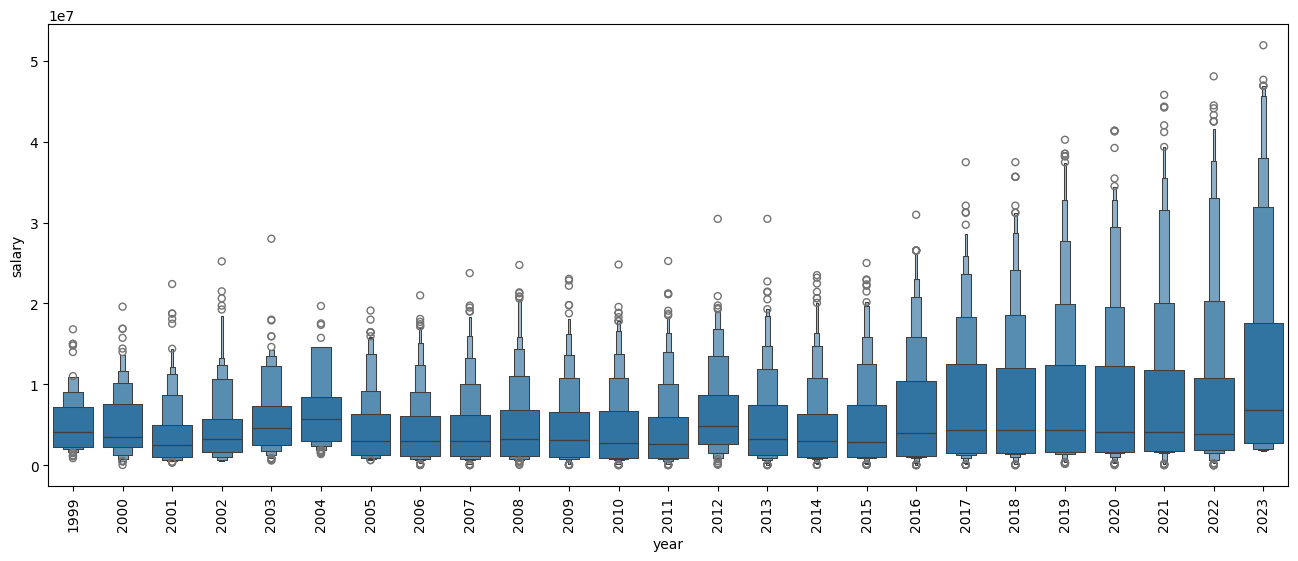

In [121]:
## grafico sobre a distribuição salarial por ano
plt.figure(figsize=(16, 6))

sns.boxenplot(x='year', y='salary', data=df_)
plt.xticks(rotation = 90)
plt.show()

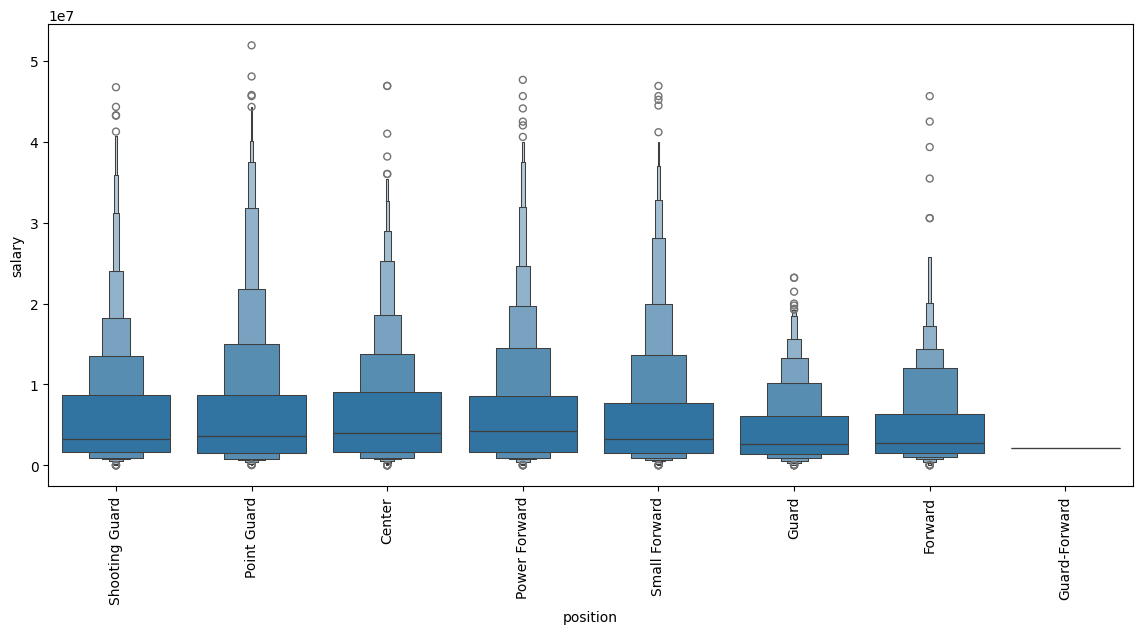

In [104]:
## grafico sobre a distribuição salarial por posição
plt.figure(figsize=(14, 6))

sns.boxenplot(x='position', y='salary', data=posi_valid)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
## calculando a eficiencia e salario com base nas posições
df_['efficiency'] = df_['avgPoints'] + df_['avgRebounds'] + df_['avgAssists'] - df_['avgTurnovers']
df_['efficiency_posi'] = df_.groupby('position')['efficiency'].transform(lambda x: (x - x.mean())/ x.std())
df_['salary_posi'] = df_.groupby('position')['salary'].transform(lambda x: (x - x.mean())/ x.std())
df_['overvalued'] = df_['salary_posi'] - df_['efficiency_posi']

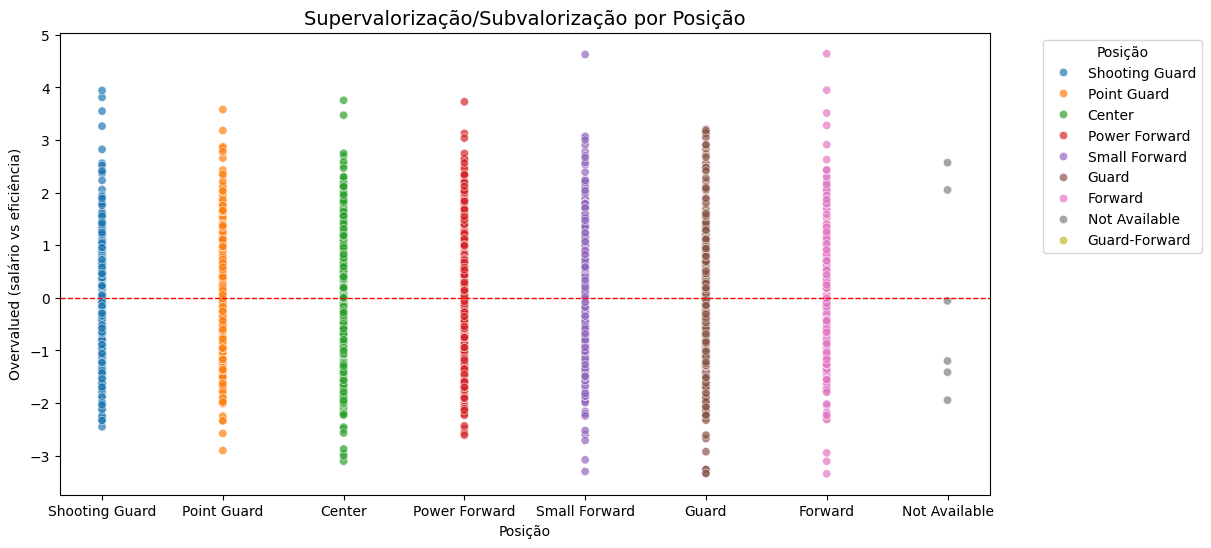

In [ ]:
## grafico sobre a distribuição do salario com base na eficiencia
plt.figure(figsize=(12, 6))
sns.scatterplot(x='position', y='overvalued', data=df_, hue='position', alpha= 0.7)

plt.axhline(0, color = 'red', linestyle = '--', linewidth = 1)
plt.title("Supervalorização/Subvalorização por Posição", fontsize=14)
plt.ylabel("Overvalued (salário vs eficiência)")
plt.xlabel("Posição")
plt.legend(title="Posição", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

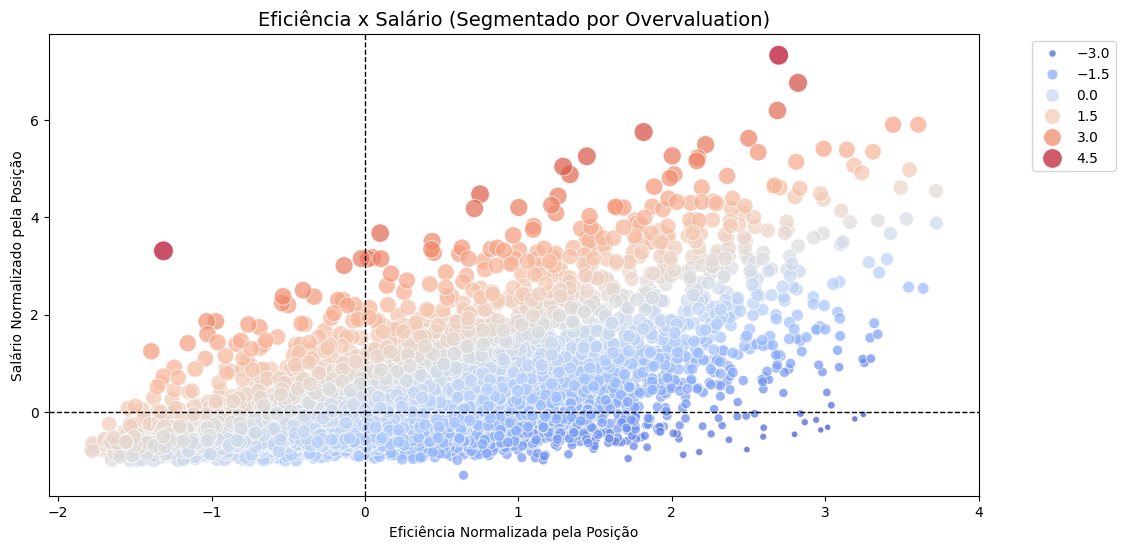

In [128]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='efficiency_posi',
    y='salary_posi',
    hue='overvalued',
    size='overvalued',
    sizes=(20, 200),
    data=df_,
    alpha=0.7,
    palette="coolwarm"
)

plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.axvline(0, color='black', linestyle='--', linewidth=1)

plt.title("Eficiência x Salário (Segmentado por Overvaluation)", fontsize=14)
plt.xlabel("Eficiência Normalizada pela Posição")
plt.ylabel("Salário Normalizado pela Posição")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

h:\Meu Drive\Pos Unifor\.venv\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


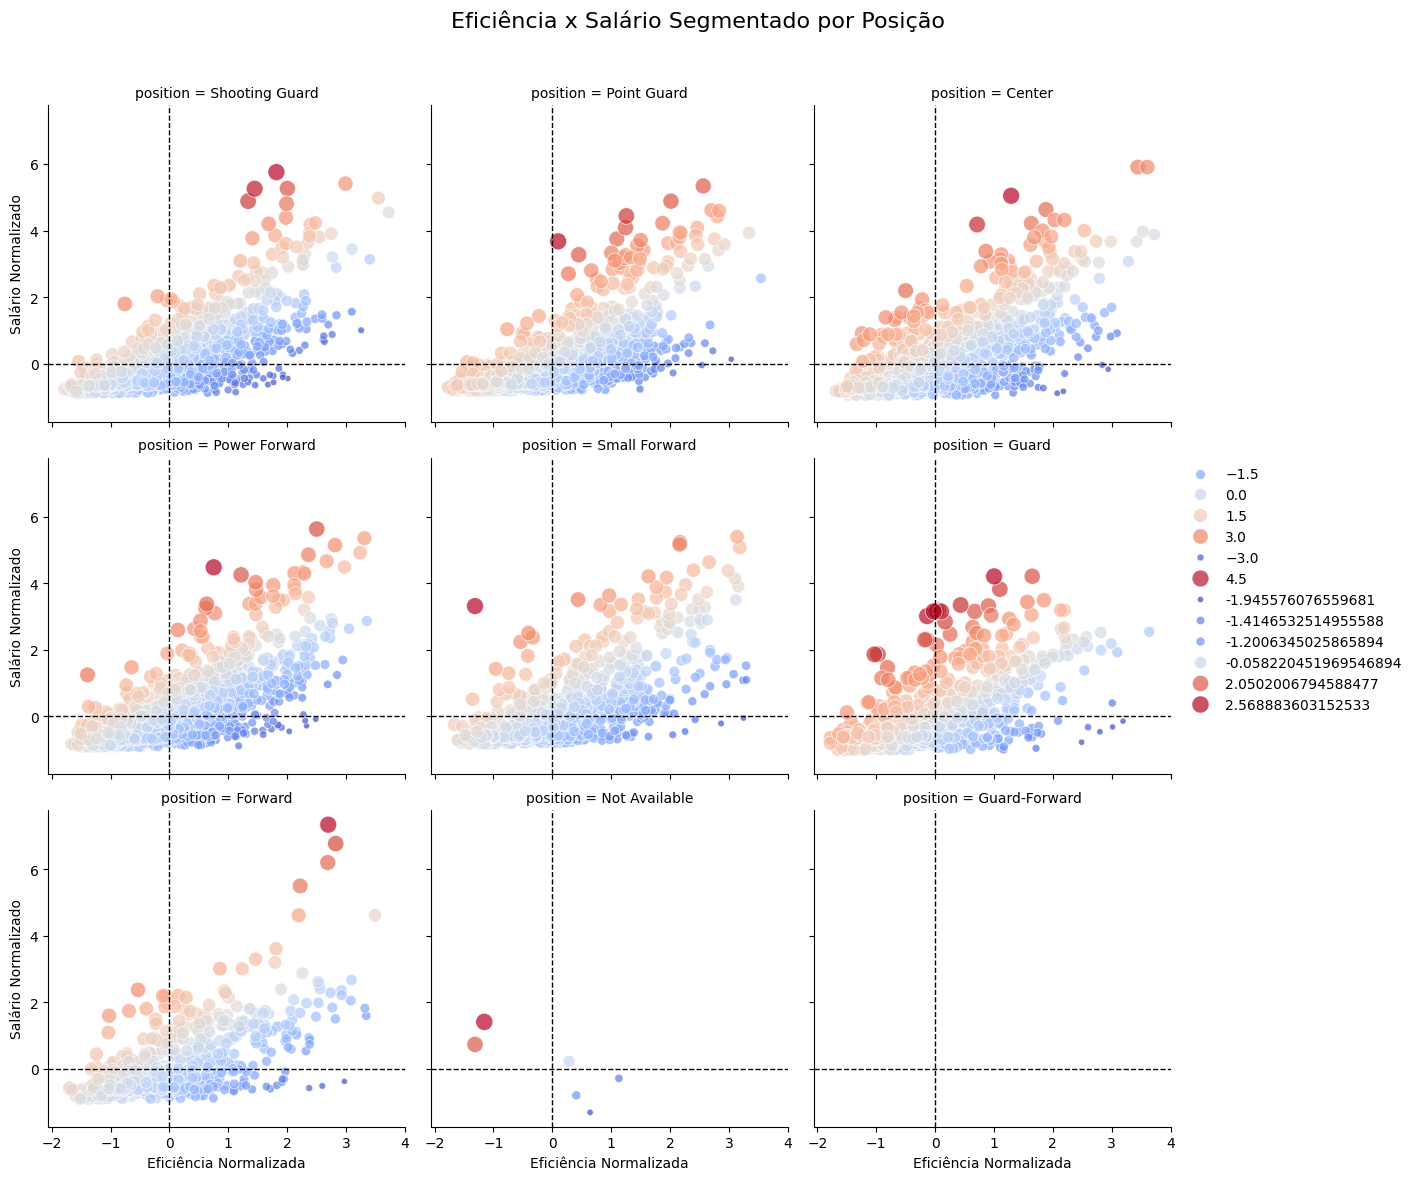

In [130]:
# Criando o FacetGrid segmentado por posição
g = sns.FacetGrid(
    df_,
    col="position",
    col_wrap=3,       # quantos gráficos por linha
    height=4,         # altura de cada gráfico
    sharex=True,      # mantém mesma escala no eixo X
    sharey=True       # mantém mesma escala no eixo Y
)

# Adicionando scatterplot em cada facet
g.map_dataframe(
    sns.scatterplot,
    x="efficiency_posi",
    y="salary_posi",
    hue="overvalued",
    size="overvalued",
    sizes=(20, 150),
    alpha=0.7,
    palette="coolwarm"
)

# Ajustando linhas de referência
for ax in g.axes.flatten():
    ax.axhline(0, color='black', linestyle='--', linewidth=1)
    ax.axvline(0, color='black', linestyle='--', linewidth=1)

# Ajustando título e legenda
g.add_legend()
g.set_axis_labels("Eficiência Normalizada", "Salário Normalizado")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Eficiência x Salário Segmentado por Posição", fontsize=16)

plt.show()
